#**Aviakompaniya yo'lovchilarining qoniqishi**

**DataFrame Tarkibi:**

- Gender: yo'lovchilarning jinsi (ayol, erkak)

- Customer Type: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

- Age: yo'lovchilarning haqiqiy yoshi

- Type of Travel: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

- Class: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

- Flight distance: Ushbu sayohatning parvoz masofasi

- Inflight wifi service: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

- Departure/Arrival time convenient: Ketish/Kelish vaqtining qoniqish darajasi

- Ease of Online booking: Onlayn bron qilishdan qoniqish darajasi

- Gate location: Darvoza joylashuvidan qoniqish darajasi

- Food and drink: Oziq-ovqat va ichimlikdan qoniqish darajasi

- Online boarding: Onlayn bortdan qoniqish darajasi

- Seat comfort: O'rindiqning qulayligidan qoniqish darajasi

- Inflight entertainment: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

- On-board service: Bort xizmatidan qoniqish darajasi

- Leg room service: oyoq xonasi xizmatidan qoniqish darajasi

- Baggage handling: bagajni tashishdan qoniqish darajasi

- Check-in service: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

- Inflight service: Parvoz ichidagi xizmatdan qoniqish darajasi

- Cleanliness: Tozalikdan qoniqish darajasi

- Departure Delay in Minutes: jo‘nash vaqtida kechikish daqiqalari

- Arrival Delay in Minutes: yetib kelganda kechikish daqiqalari

- Satisfaction: Aviakompaniyaning qoniqish darajasi (qoniqish, neytral yoki norozilik)

# Machine Learning uchun CRISP_DM Loyiha qadamlari:

**1-QADAM : BIZNESNI (FAOLIYAT) O'RGANISH**

    1-bosqich: Jarayonni tushunish: **Текст, выделенный полужирным шрифтом**

         a. a. Buyurtmachi - "Best Fly Uzbekistan" MChJ.
            Buyurtma - DataFrame Aviakompaniya yo'lovchilarining qoniqish so'rovini o'z ichiga oladi. Yo'lovchilarning qoniqishini bashorat qila olish bo'yicha Classification Model yaratish
            Mavjud DataSet - https://www.kaggle.com/competitions/aviakompaniya/data?select=train_dataset.csv
    
         b. Buyurtmachi orqali suhbat:
            Biz yaratgan Regression Model, modelimizning chiqishi boshqa kattaroq modelning kirishiga ulanadi;
            Biz to'plagan DataSet ichidagi hozirgi qoniqish, avvalda qatnovda ishtirok etgan insonlar bo'yicha yi'g'ilgan baza hosil bo'lgan qoniqish bo'yicha;
            Mavjud usulning ya'ni Modelimiz orqali emas, balki ekspertlar chiqargan natija aniqligi qanday? 20%
    
    2-bosqich: Analitik yondashuvni aniqlash:

        a. Qaysi Machine Learning turini qo'llaymiz? - Supervised, chunki bizga Label qismi mavjud
        b. Muammoning turi (Algorithm) qanday? - Classification Model
        c. Usul? - 20 % Offline / 70 % Online
        d. Modelimiz aniqligini qanday aniqlaymiz? Classification Report hamda Accuracy Score

**2-QADAM : MA'LUMOTLARNI O'RGANISH (Exploring Data)**

    3-bosqich: Ma'lumotlarga qo'yilgan talablar

    4-bosqich: Ma'lumotlarni yig'ish
    
    5-bosqich: Ma'lumotlarni talqin qilish

In [15]:
import pandas as pd # data cleaning
import numpy as np # linear algebra
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

import sklearn # sci-kit learn for Machine Learning Models

# kerakli kutubxonalar

In [16]:
df_train = pd.read_csv(r"D:\Assalom alaikum\Lessons for JOB\Data Science\PROJECTS\Final ML Projects Course mohirdev\train_dataset.csv")
df_test= pd.read_csv(r"D:\Assalom alaikum\Lessons for JOB\Data Science\PROJECTS\Final ML Projects Course mohirdev\test_dataset.csv")

# kerakli dataframe'ni yuklash

In [17]:
df_train["satisfaction"].value_counts()

# eng muhim Column qiymatlarini: 0 - unsatisfaction; 1 - satisfaction

satisfaction
0    5000
1    5000
Name: count, dtype: int64

In [18]:
df_train.shape

# train_dataset o'lchami: 10000 - Rows; 23 - Columns

(10000, 24)

In [19]:
df_test.shape

# test_dataset o'lchami: 10000 - Rows; 23 - Columns

(4000, 23)

In [20]:
df_train.isnull().sum()

# faqat "Arrival Delay in Minutes" ustunida 28 null qiymat mavjud

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [21]:
df_test.isnull().sum()

# faqat "Arrival Delay in Minutes" ustunida 19 null qiymat mavjud

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [22]:
df_train["Arrival Delay in Minutes"] = df_train["Arrival Delay in Minutes"].fillna(value = df_train["Arrival Delay in Minutes"].mean())

# mean metodi orqali null qiymatlar to'ldirildi

In [23]:
df_test["Arrival Delay in Minutes"] = df_test["Arrival Delay in Minutes"].fillna(value = df_test["Arrival Delay in Minutes"].mean())

# mean metodi orqali null qiymatlar to'ldirildi

In [24]:
df_train.isnull().sum()

# yana null qiymatlar tekshirib olindi

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [25]:
df_test.isnull().sum()

# yana null qiymatlar tekshirib olindi

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [26]:
df_train.columns

# ustunlar nomlari aniqlashtirildi

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [27]:
df_train.info()

# data type aniqlash va Categorical types ustunlar aniqlandi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [28]:
df_test.info()

# data type aniqlash va Categorical types ustunlar aniqlandi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [29]:
df_train["Gender"].value_counts()

Gender
Female    5169
Male      4831
Name: count, dtype: int64

In [30]:
df_train["Gender"] = df_train["Gender"].replace({
    "Male" : 1,
    "Female" : 0
})

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\2797831992.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Gender"] = df_train["Gender"].replace({


In [31]:
df_train["Customer Type"].value_counts()

Customer Type
Loyal Customer       8307
disloyal Customer    1693
Name: count, dtype: int64

In [32]:
df_train["Customer Type"] = df_train["Customer Type"].replace({
    "Loyal Customer" : 1,
    "disloyal Customer" : 0
})

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\4100091422.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Customer Type"] = df_train["Customer Type"].replace({


In [33]:
df_train["Type of Travel"].value_counts()

Type of Travel
Business travel    7079
Personal Travel    2921
Name: count, dtype: int64

In [34]:
df_train["Type of Travel"] = df_train["Type of Travel"].replace({
    "Business travel" : 1,
    "Personal Travel" : 0
})

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\2350796989.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Type of Travel"] = df_train["Type of Travel"].replace({


In [35]:
df_train["Class"].value_counts()

Class
Business    5048
Eco         4251
Eco Plus     701
Name: count, dtype: int64

In [36]:
df_train["Class"] = df_train["Class"].replace({
    "Business" : 0,
    "Eco" : 1,
    "Eco Plus" : 2
})

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\2841006799.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Class"] = df_train["Class"].replace({


In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordin_encoded = OrdinalEncoder()

df_test[['Gender','Customer Type','Type of Travel','Class']]  = ordin_encoded.fit_transform(df_test[['Gender','Customer Type','Type of Travel','Class']])
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0.0,0.0,25,1.0,1.0,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,0.0,0.0,49,0.0,0.0,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,1.0,0.0,51,0.0,0.0,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,1.0,0.0,34,0.0,2.0,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,1.0,0.0,34,1.0,1.0,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [38]:
df_test.info()

# yuqoridagi o'zgartirishlar natijasida yana Data types tekshirildi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   float64
 2   Customer Type                      4000 non-null   float64
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   float64
 5   Class                              4000 non-null   float64
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [39]:
df_train.describe()

# dataset'ning umumiy statistikasi aniqlandi

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.483100,0.830700,39.375100,0.707900,0.565300,1229.556200,2.780200,3.065100,2.797800,...,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,0.499739,0.375035,14.897959,0.454751,0.621268,1022.281958,1.362745,1.527316,1.421168,...,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,39.990245,0.500025
min,1.00000,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,0.000000,1.000000,27.000000,0.000000,0.000000,421.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,0.000000,1.000000,40.000000,1.000000,0.000000,863.500000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,1.000000,1.000000,51.000000,1.000000,1.000000,1806.750000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,10000.00000,1.000000,1.000000,80.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [40]:
df_test.describe()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000
mean,2000.500000,0.503250,0.184000,39.886750,0.282250,0.562250,1217.960000,2.768250,3.021250,2.788500,...,3.514250,3.412000,3.405750,3.379750,3.631250,3.334500,3.679500,3.349750,13.86525,14.157749
std,1154.844867,0.500052,0.387533,14.748519,0.450151,0.621065,1012.709063,1.380948,1.554478,1.448721,...,1.319179,1.322382,1.275352,1.346103,1.187487,1.257778,1.184749,1.319796,35.48267,35.746366
min,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,1000.750000,0.000000,0.000000,27.000000,0.000000,0.000000,416.750000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,2000.500000,1.000000,0.000000,40.000000,0.000000,0.000000,868.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.00000,0.000000
75%,3000.250000,1.000000,0.000000,51.000000,1.000000,1.000000,1750.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,4000.000000,1.000000,1.000000,80.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,624.00000,615.000000


## **Data Visualization with Correlation**

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\3168496406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_train.to_frame()[0], y=corr_train.to_frame().index, palette='Blues_r')


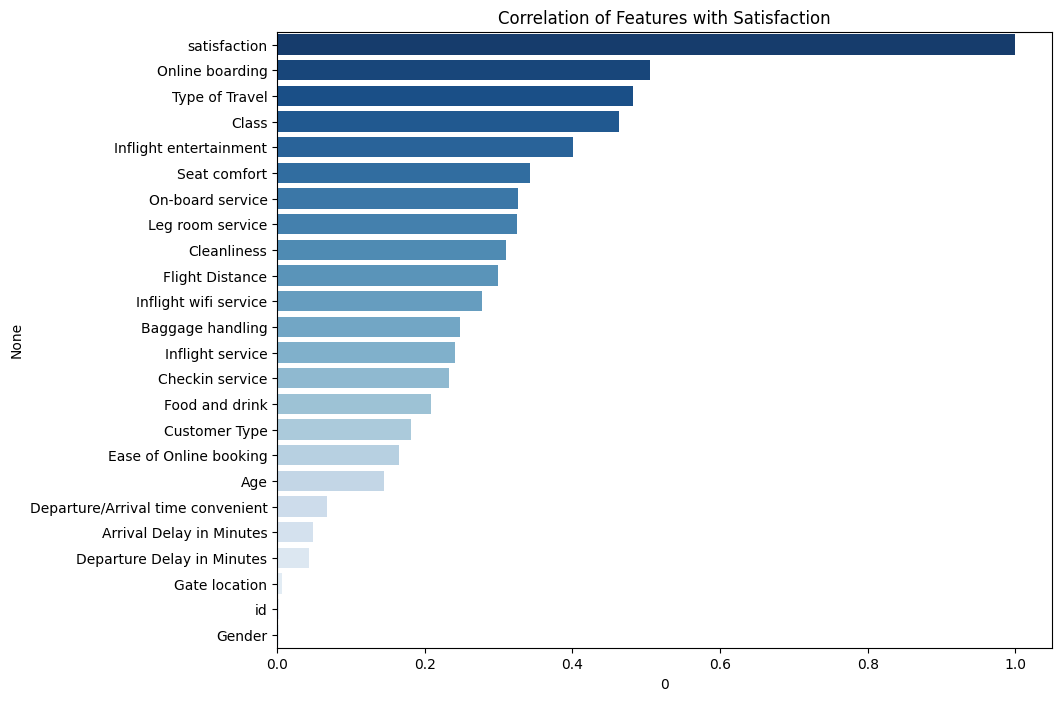

In [41]:
corr_train = df_train.corrwith(df_train['satisfaction'], numeric_only=True).abs().sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=corr_train.to_frame()[0], y=corr_train.to_frame().index, palette='Blues_r')
plt.title('Correlation of Features with Satisfaction')
plt.show()

# Train dataset uchun "Satisfaction" ustuni bilan yuqori Correlation bo'lgan ustunlar aniqlandi

In [42]:
not_corr_train_columns = ["On-board service", "Leg room service", "Cleanliness", "Flight Distance", "Inflight wifi service",
                    "Baggage handling", "Inflight service", "Checkin service", "Food and drink", "Customer Type",
                    "Ease of Online booking", "Age", "Departure/Arrival time convenient", "Arrival Delay in Minutes",
                    "Departure Delay in Minutes", "Gate location", "Gender"]

df_train = df_train.drop(not_corr_train_columns, axis = 1)

# Train_dataset uchun Correlation juda past bo'lganlar .drop qilindi

In [43]:
not_corr_test_columns = ["On-board service", "Leg room service", "Cleanliness", "Flight Distance", "Inflight wifi service",
                    "Baggage handling", "Inflight service", "Checkin service", "Food and drink", "Customer Type",
                    "Ease of Online booking", "Age", "Departure/Arrival time convenient", "Arrival Delay in Minutes",
                    "Departure Delay in Minutes", "Gate location", "Gender"]

df_test = df_test.drop(not_corr_test_columns, axis = 1)

# Train_dataset uchun Correlation juda past bo'lganlar .drop qilindi

In [44]:
print(f"Keraksiz ustunlar soni: {len(not_corr_train_columns)} ta")
print(f"Kerakli ustunlar soni: {len(df_train.columns)} ta")
print(f"Jami ustunlar soni: {len(not_corr_train_columns) + len(df_train.columns)} ta")

Keraksiz ustunlar soni: 17 ta
Kerakli ustunlar soni: 7 ta
Jami ustunlar soni: 24 ta


In [45]:
correlation = df_train.select_dtypes(include = "number").corr().sort_values(by = "satisfaction")

corr_satisfaction = correlation["satisfaction"].sort_values(ascending = False)
corr_satisfaction

# faqat "satisfaction" ustuni uchun eng katta bog'liq bo'lgan ustunlar

satisfaction              1.000000
Online boarding           0.504986
Type of Travel            0.482266
Inflight entertainment    0.400900
Seat comfort              0.342294
id                        0.002931
Class                    -0.463430
Name: satisfaction, dtype: float64

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\1046178703.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data = df_train, x = "satisfaction", hue = "Online boarding", color = "blue")


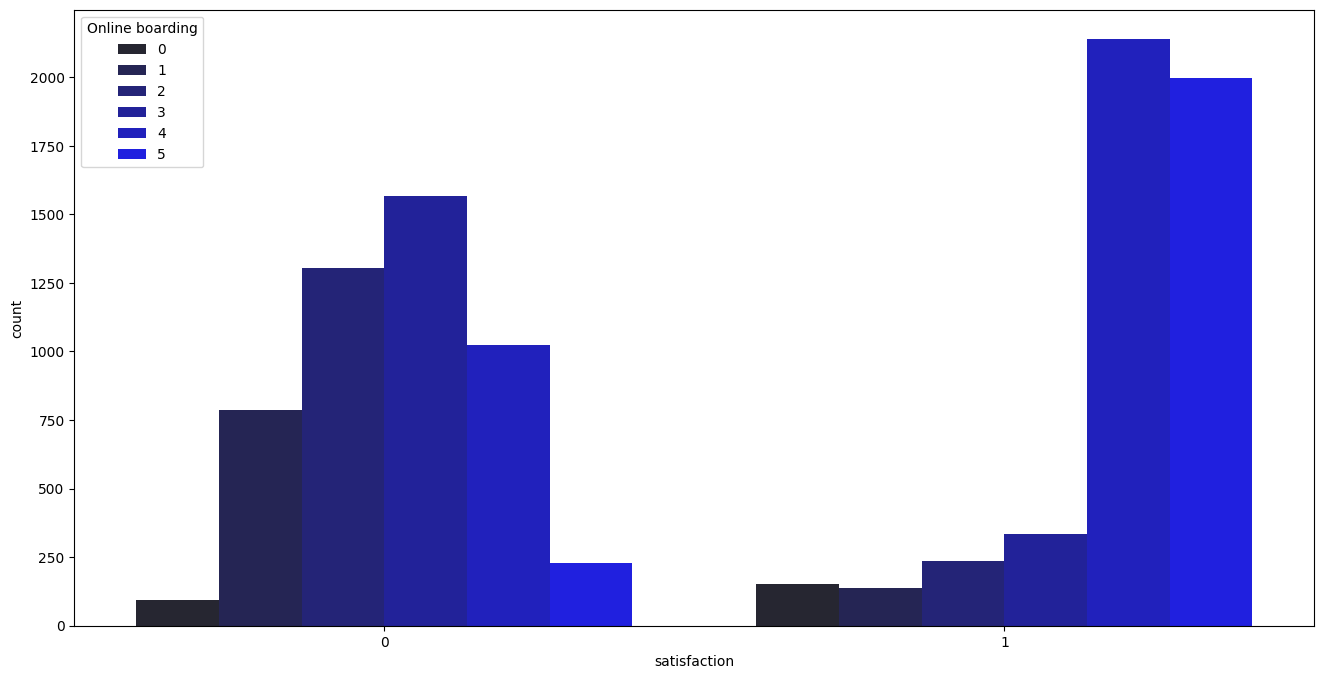

In [46]:
plt.figure(figsize = (16, 8))
sns.countplot(data = df_train, x = "satisfaction", hue = "Online boarding", color = "blue")
plt.show()

# Aviaqatnovdan Qoniqish yoki qoniqmaslik, Online boarding - qoniqishni 5 shkalada baholangan

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_16116\2233869935.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data = df_train, x = "satisfaction", hue = "Type of Travel", color = "red")


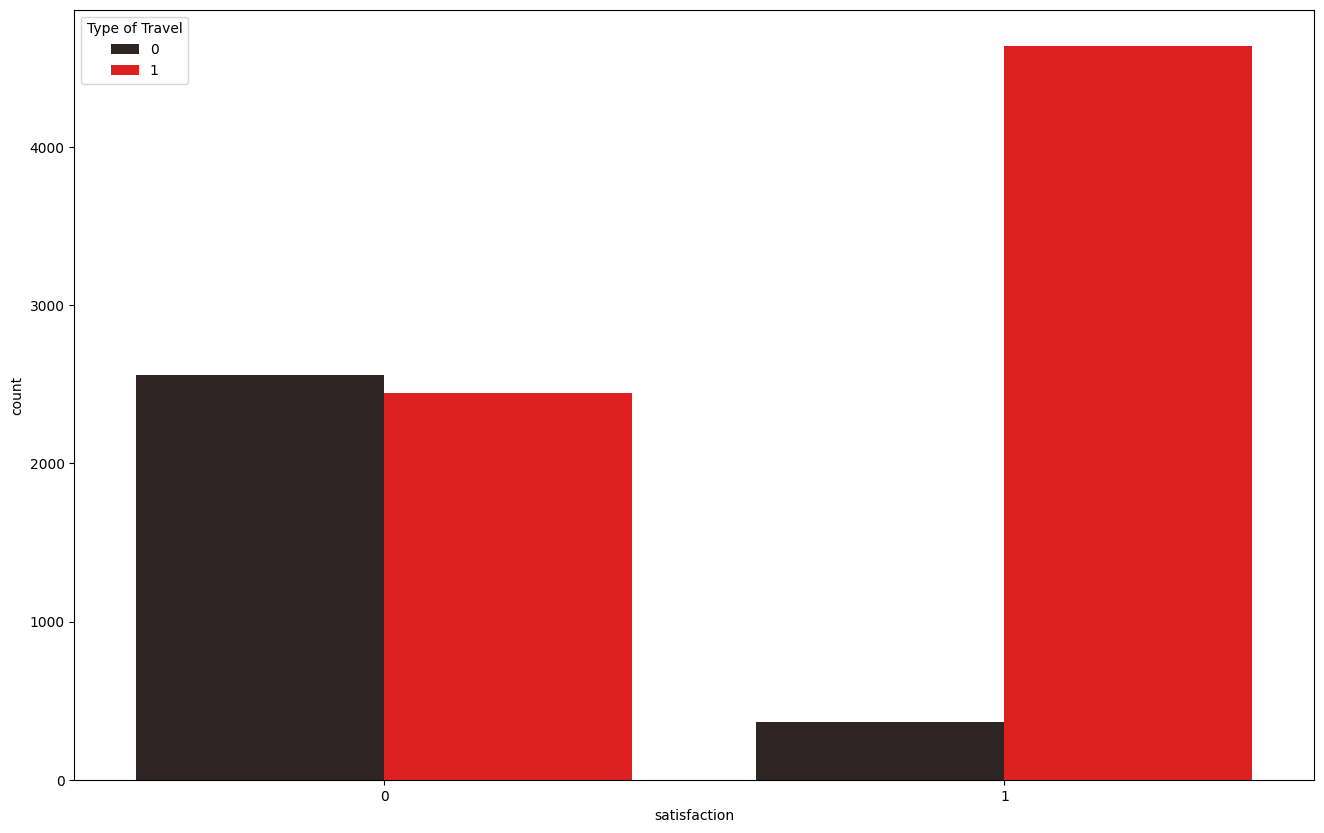

In [47]:
plt.figure(figsize = (16, 10))
sns.countplot(data = df_train, x = "satisfaction", hue = "Type of Travel", color = "red")
plt.show()

# Aviaqatnovdan Qoniqish yoki qoniqmaslik, Type of Travel orqali tahlil qilingan
# demak, business travelda Qoniqish ancha yuqori ekan, Personal'ga nisbatan

In [48]:
df_train.sample(5)

# dataset'ning eng kerakli qismi qoldi va bu Mashine Learning processing uchun tayyor

,id,Type of Travel,Class,Online boarding,Seat comfort,Inflight entertainment,satisfaction
205,206,0,1,2,4,4,0
1749,1750,0,1,2,4,4,0
199,200,1,2,5,5,5,1
2698,2699,1,0,4,4,3,1
2941,2942,0,0,4,5,1,0


In [49]:
df_test.sample(5)

# dataset'ning eng kerakli qismi qoldi va bu Mashine Learning processing uchun tayyor

,id,Type of Travel,Class,Online boarding,Seat comfort,Inflight entertainment
703,704,0.0,0.0,3,2,5
3989,3990,1.0,1.0,3,1,1
3241,3242,0.0,0.0,4,4,4
2954,2955,1.0,1.0,4,5,5
951,952,1.0,1.0,3,5,5


**3-QADAM: MA'LUMOTLARNI TAYYORLASH**

Ma'lumotlarni ajratib olish (X-parametrlar) va Labellash (Y label)

In [50]:
X = df_train.drop("satisfaction", axis = 1)
y = df_train["satisfaction"]

print(f"Parametr yoki Input qismi: {X}")
print(f"Label qismi: {y}")

# dataset X-parametr va y-label ajratildi

Parametr yoki Input qismi:          id  Type of Travel  Class  Online boarding  Seat comfort  \
0         1               1      1                2             4   
1         2               1      0                5             4   
2         3               1      1                4             3   
3         4               1      0                2             2   
4         5               0      1                3             4   
...     ...             ...    ...              ...           ...   
9995   9996               0      1                5             4   
9996   9997               1      2                3             3   
9997   9998               1      0                4             5   
9998   9999               1      0                4             5   
9999  10000               1      0                3             5   

      Inflight entertainment  
0                          4  
1                          5  
2                          1  
3                   

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 12)

# train_set va test_set ajratildi

In [74]:
print(
    f"Umumiy Parametr hajmi: {X.shape}\n"
    )
print(
    f"Umumiy  Label hajmi: {y.shape}\n"
    )
print(
    f"X-parametrlar uchun\n"
        f"Train set o'lchovi: {X_train.shape} va\n"
        f"Test set o'lchovi: {X_test.shape}\n"
    )
print(
    f"y-Label uchun\n"
        f"Train set o'lchovi: {y_train.shape} va\n"
        f"Test set o'lchovi: {y_test.shape}\n"
    )

Umumiy Parametr hajmi: (10000, 6)

Umumiy  Label hajmi: (10000,)

X-parametrlar uchun
Train set o'lchovi: (6000, 6) va
Test set o'lchovi: (4000, 6)

y-Label uchun
Train set o'lchovi: (6000,) va
Test set o'lchovi: (4000,)



**4-QADAM: MODELLASH**

Evaulation

In [75]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

# Logistik Regression Classification Model

c:\Program Files\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
X_test.shape

(4000, 6)

In [77]:
y_prediction = logistic_reg.predict(X_test)

# X_test nisbatan bashorat qilish

In [78]:
y_test.head()

5669    0
8800    0
3205    0
8731    1
6412    1
Name: satisfaction, dtype: int64

In [79]:
print(y_test.shape, y_prediction.shape)

(4000,) (4000,)


**5-QADAM: MODELNI BAHOLASH**

In [80]:
from sklearn.metrics import accuracy_score

test_data_accuracy = accuracy_score(y_test, y_prediction)

print(f"Accuracy score of the training data: {test_data_accuracy * 100}% aniqlikda bashorat qilyapti")

# modelimizni accuracy score orqali tekshirish

Accuracy score of the training data: 82.3% aniqlikda bashorat qilyapti


              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2006
           1       0.83      0.81      0.82      1994

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000

Model aniqligi: 0.823


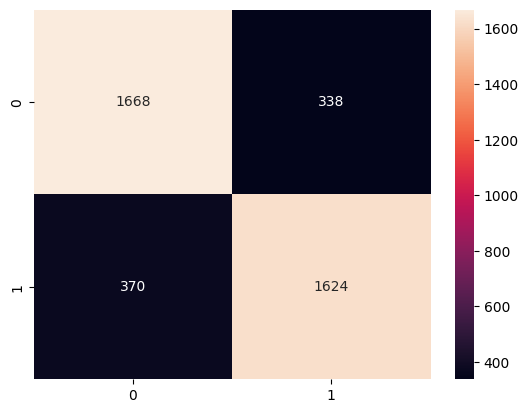

In [81]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_prediction))
print("Model aniqligi:", metrics.accuracy_score(y_test, y_prediction))

conf_mat = metrics.confusion_matrix(y_test, y_prediction)
sns.heatmap(conf_mat, annot=True, fmt="g")
plt.show()

# **Submission**

In [82]:
ids = df_test['id'].values
X_test = df_test.drop("id", axis=1).values

In [84]:
submission = pd.DataFrame({
    'id': ids,
    'satisfaction' : y_prediction.reshape(-1)
})

In [85]:
submission.to_csv("submission_ML_flight_satisfaction.csv",index=False)